# ANALISIS EXPLORATORIO DE DATOS (EDA)

In [210]:
# Importacion de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [217]:
#importacion de datos

df_train = pd.read_csv('../Data/train.csv')

In [218]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

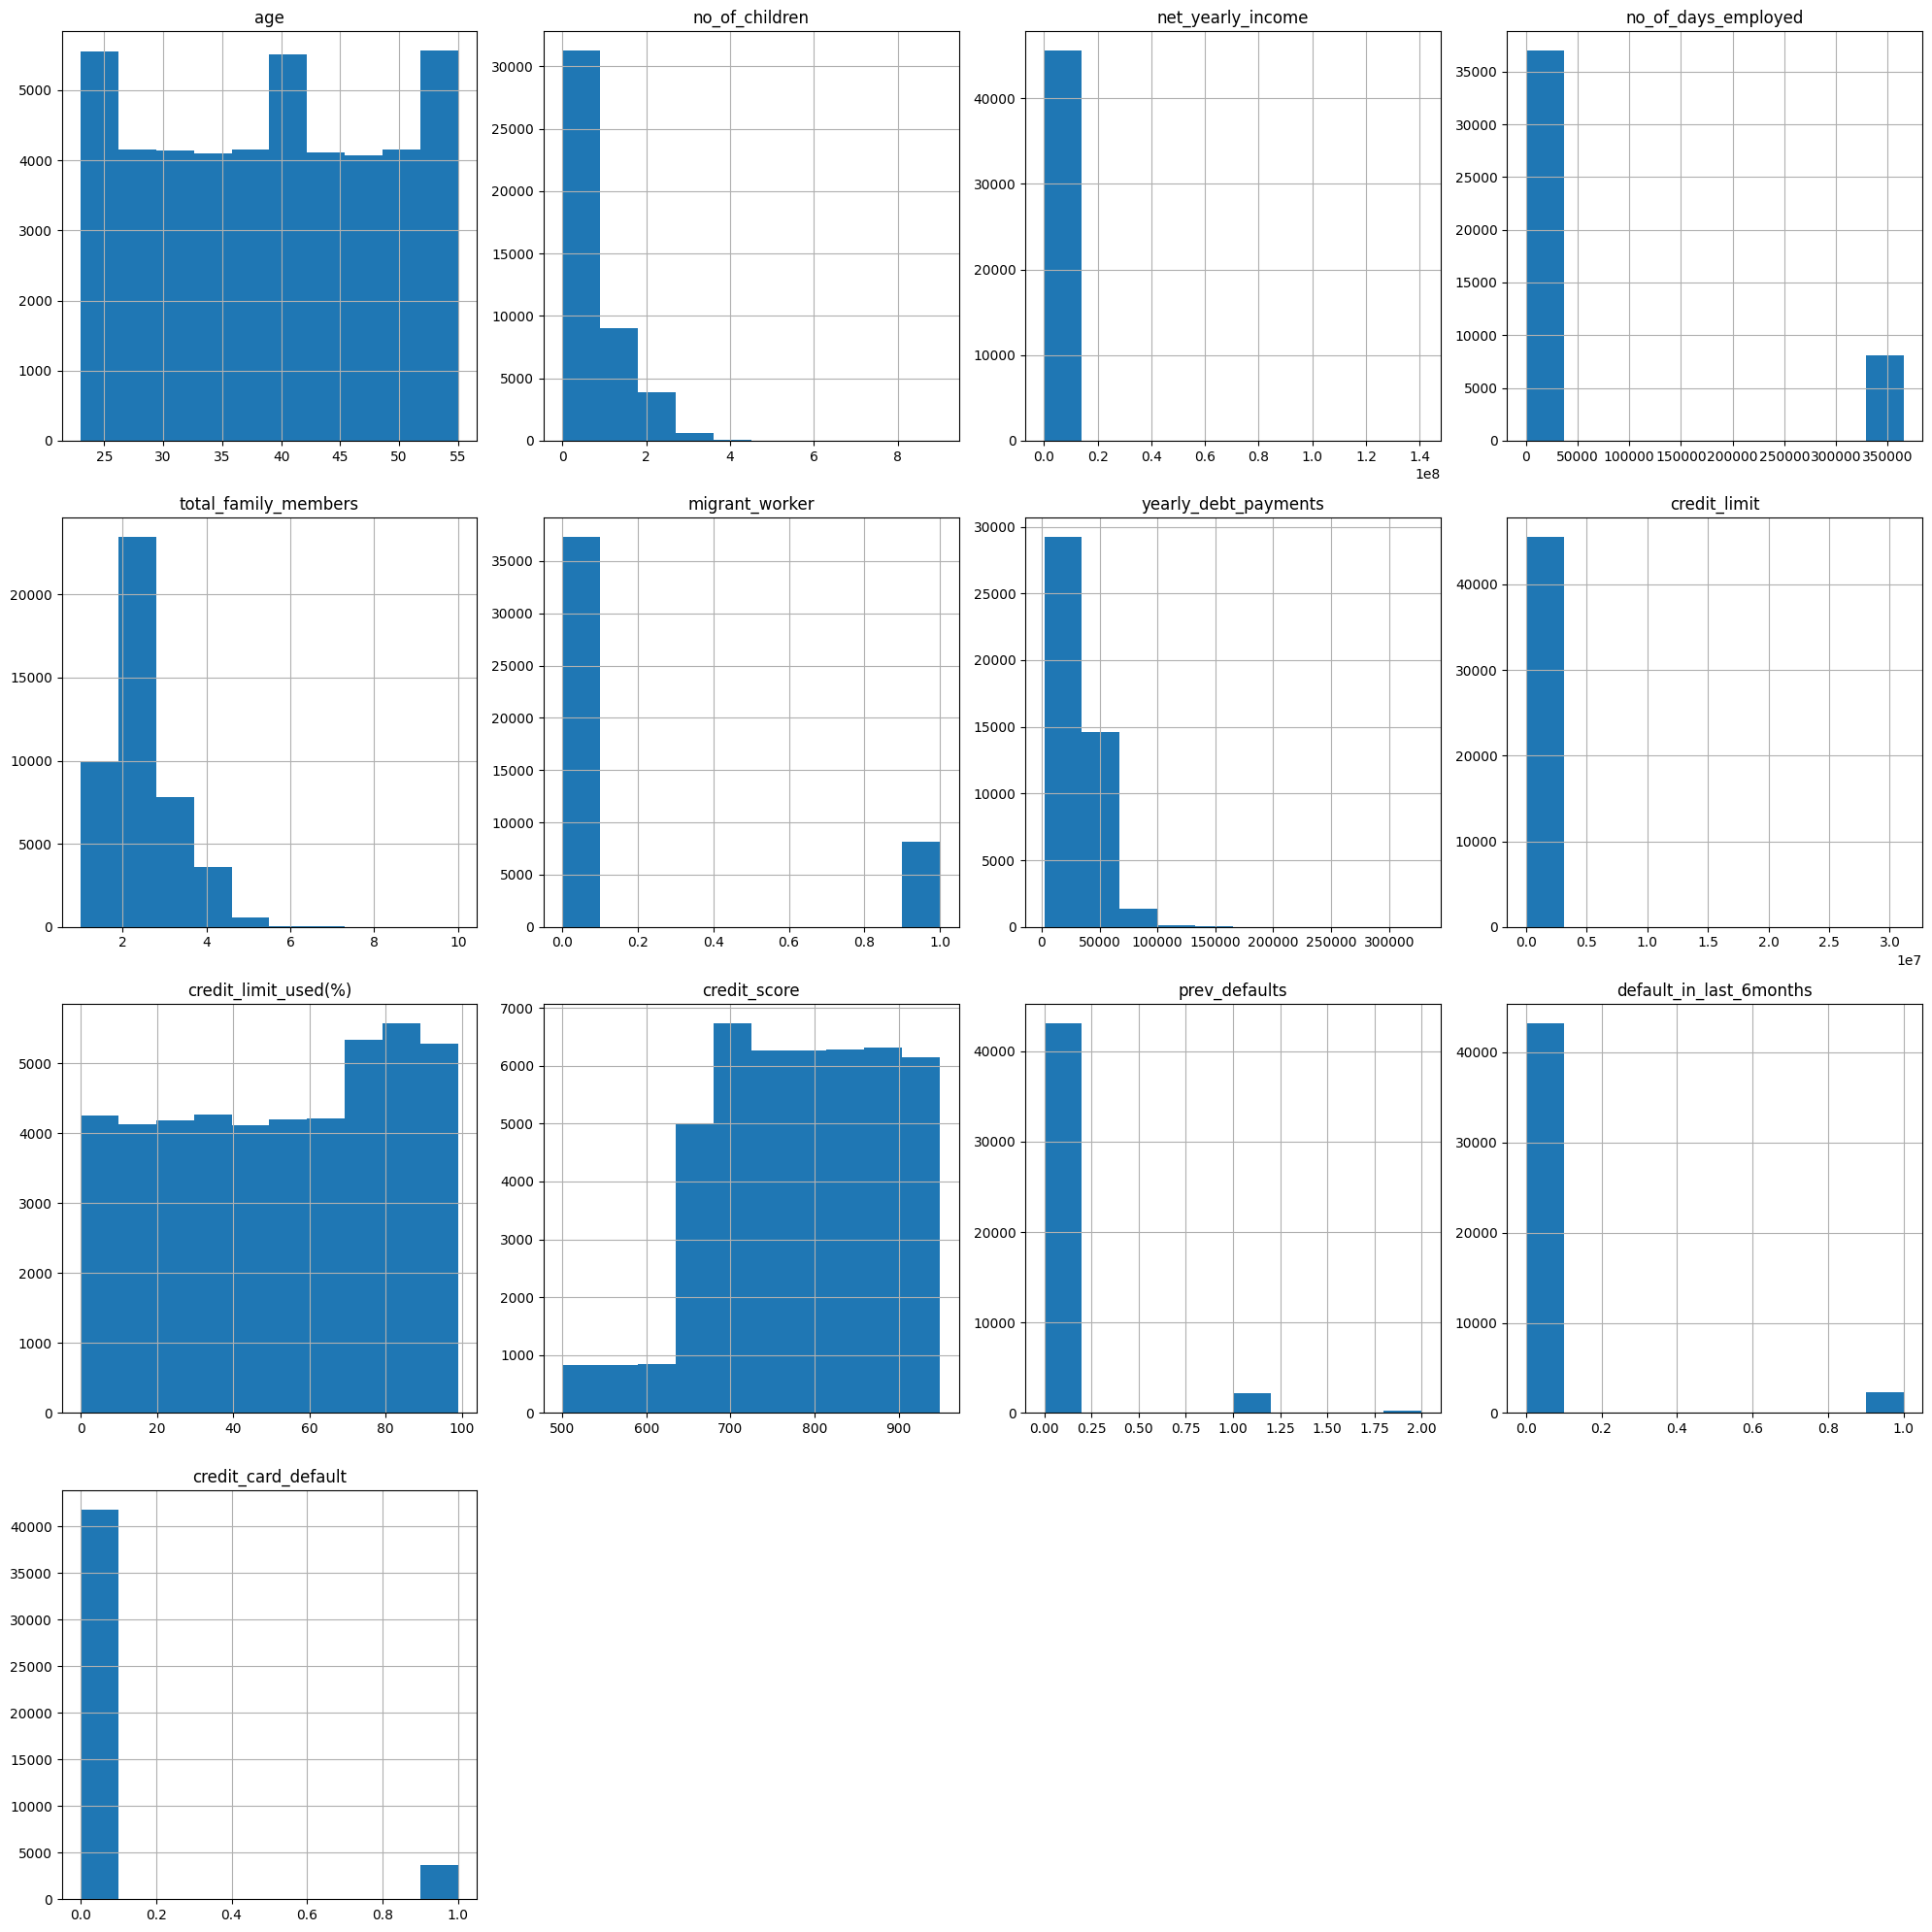

In [219]:
df_train.hist(figsize=(20,20))
plt.tight_layout()

In [220]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45528.0,38.993411,9.543990,23.00,31.000,39.000,47.0000,5.500000e+01
no_of_children,44754.0,0.420655,0.724097,0.00,0.000,0.000,1.0000,9.000000e+00
net_yearly_income,45528.0,200655.622249,669074.034607,27170.61,126345.835,171714.910,240603.7600,1.407590e+08
no_of_days_employed,45065.0,67609.289293,139323.524434,2.00,936.000,2224.000,5817.0000,3.652520e+05
total_family_members,45445.0,2.158081,0.911572,1.00,2.000,2.000,3.0000,1.000000e+01
migrant_worker,45441.0,0.179111,0.383450,0.00,0.000,0.000,0.0000,1.000000e+00
yearly_debt_payments,45433.0,31796.965311,17269.727234,2237.47,19231.140,29081.650,40561.1500,3.281129e+05
credit_limit,45528.0,43548.416028,148784.686878,4003.14,23973.805,35688.045,53435.7625,3.112997e+07
credit_limit_used(%),45528.0,52.235020,29.376910,0.00,27.000,54.000,78.0000,9.900000e+01
credit_score,45520.0,782.791257,100.619746,500.00,704.000,786.000,867.0000,9.490000e+02


In [221]:
df_train.describe(include='O').T

,count,unique,top,freq
customer_id,45528,45528,CST_160078,1
name,45528,4010,Jonathan,207
gender,45528,3,F,29957
owns_car,44981,2,N,29743
owns_house,45528,2,Y,31642
occupation_type,45528,19,Unknown,14299


# Analisis de las variables del dataset

En esta primera fase analizamos la informacion de cada variable predictora con respecto a la variable objetivo credit_card_default. El Dataset de entrenamiento muestra un evidente desbalanceo de clases, mostrando una proporcion mayor de clientes que no presentan morosidad (default) en su tarjeta de credito.

Text(0.5, 1.0, 'Distribución de credit_card_default')

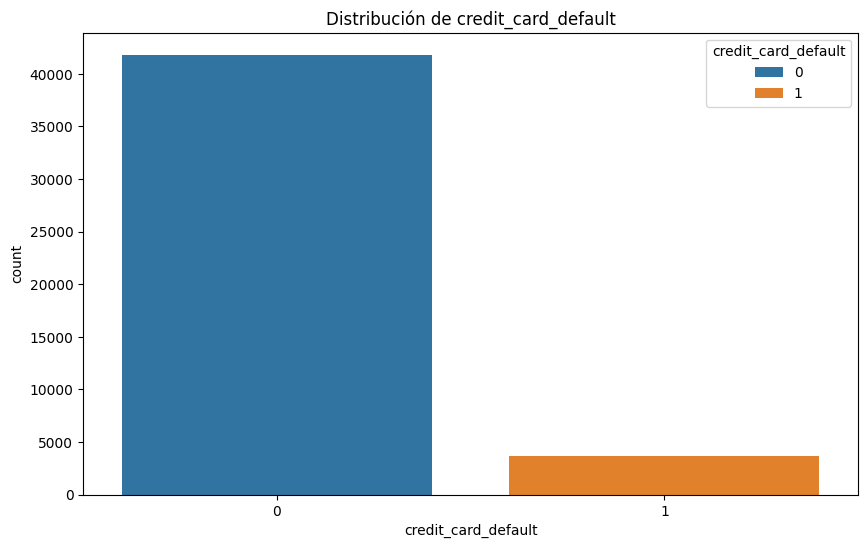

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='credit_card_default', hue='credit_card_default')
plt.title('Distribución de credit_card_default')

Es importante tener en cuenta este desbalance de clase a la hora de entrenar los modelos de Machine Learning. Para esta situacion utilizaremos validacion cruzada estatrificada para garantizar un correcto balance entre las clases cuando se realice la division de datos de entrenamiento y prueba.

## Edad vs Morosidad

Observamos que la distribucion de la morosidad respecto al genero se comporta de igual manera que en terminos generales. Unico detalle a resaltar es que existe una maor cantidad de mujeres en el dataset.

Text(0.5, 1.0, 'Distribución de credit_card_default por género')

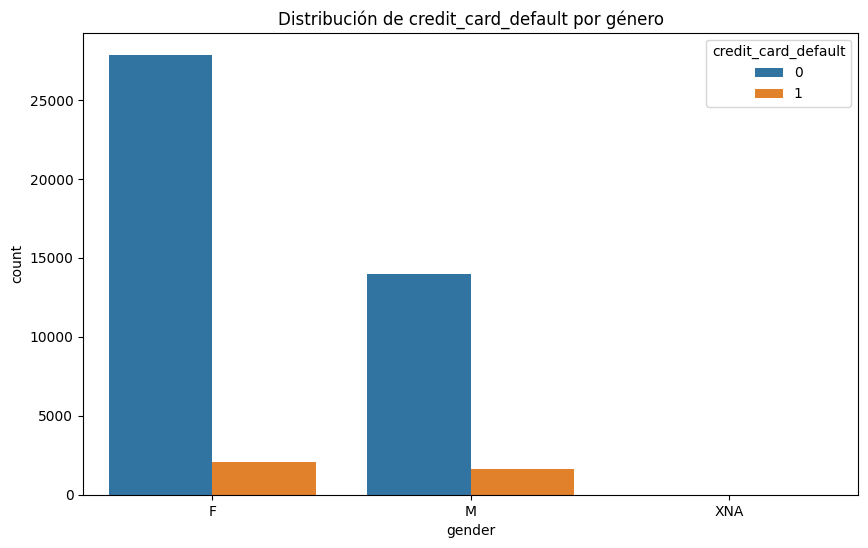

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='gender', hue='credit_card_default')
plt.title('Distribución de credit_card_default por género')

## Inmigrante vs Morosidad

Text(0.5, 1.0, 'Distribución de credit_card_default por Trabajador Inmigrante')

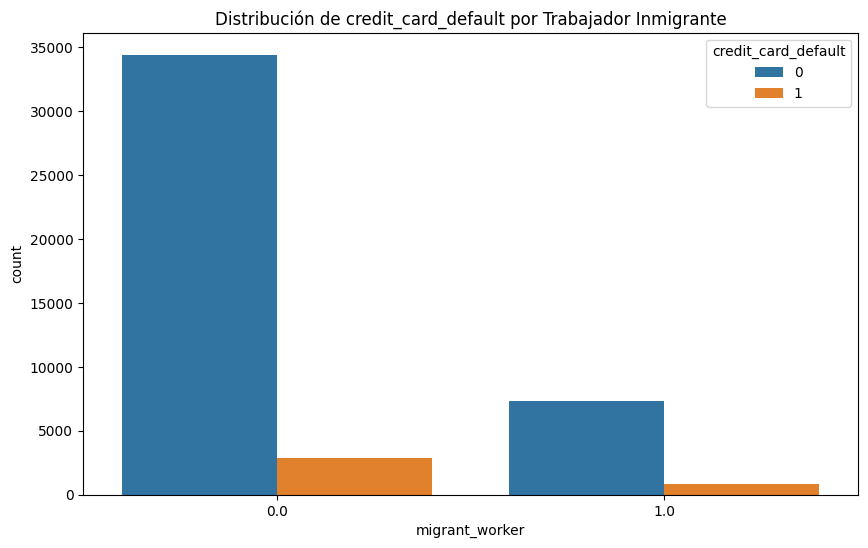

In [180]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='migrant_worker', hue='credit_card_default')
plt.title('Distribución de credit_card_default por Trabajador Inmigrante')

## Numero de hijos vs Morosidad

En cuanto a la distribucion de numero de hijos se observa mayor morosidad en clientes que no tienen hijos.

Text(0.5, 1.0, 'Distribución de credit_card_default por número de hijos')

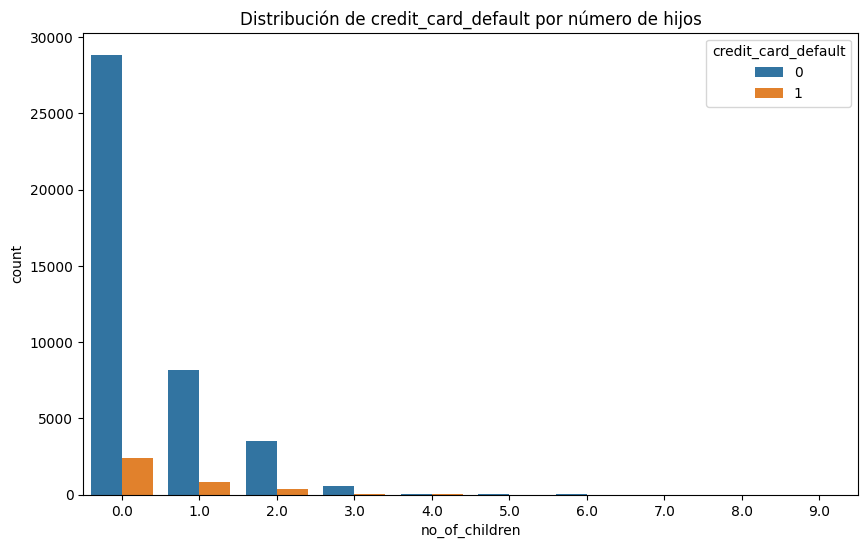

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='no_of_children', hue='credit_card_default')
plt.title('Distribución de credit_card_default por número de hijos')

## Miembros de la familia vs Morosidad

Los datos nos muestran una mayor morosidad en clientes cuyo nucleo familar esta compuesto por dos personas.

Text(0.5, 1.0, 'Distribución de credit_card_default por número de miembros en la familia')

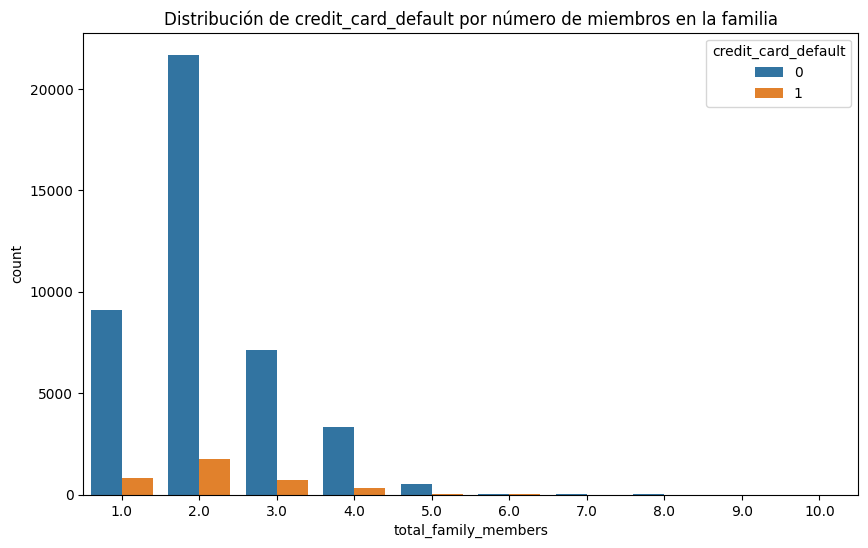

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='total_family_members', hue='credit_card_default')
plt.title('Distribución de credit_card_default por número de miembros en la familia')

## Ingresos anuales vs Morosidad

En cuanto al limite de credito se observa una evidente asimetria en la distribucion de estos datos.

Valor de Asimetria : 199.43


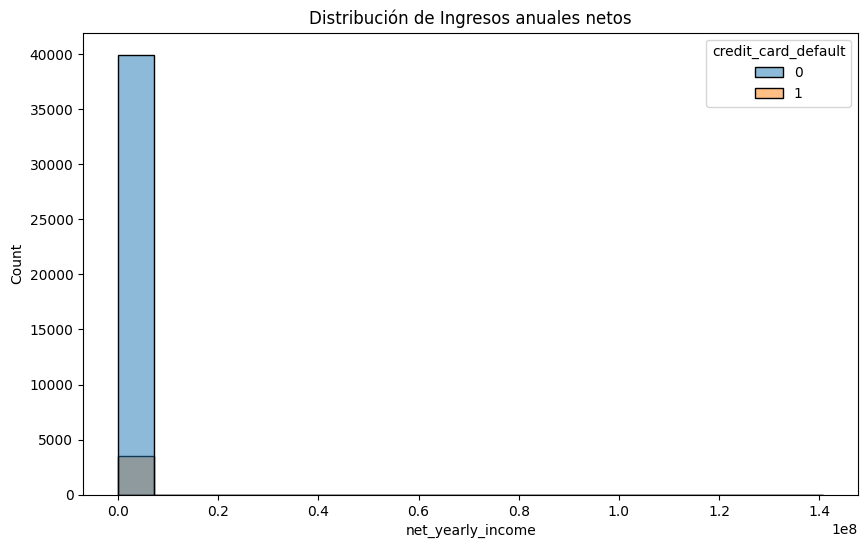

In [215]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='net_yearly_income', hue='credit_card_default', bins=20)
plt.title('Distribución de Ingresos anuales netos')

print('Valor de Asimetria :', round(skew(df_train['net_yearly_income']), 2))


## Limite de credito vs Morosidad

Al igual que la distribucion anterior, el limite de credito otorgado a cada cliente presenta una alta asimetria positiva.

Valor de Asimetria : 196.35


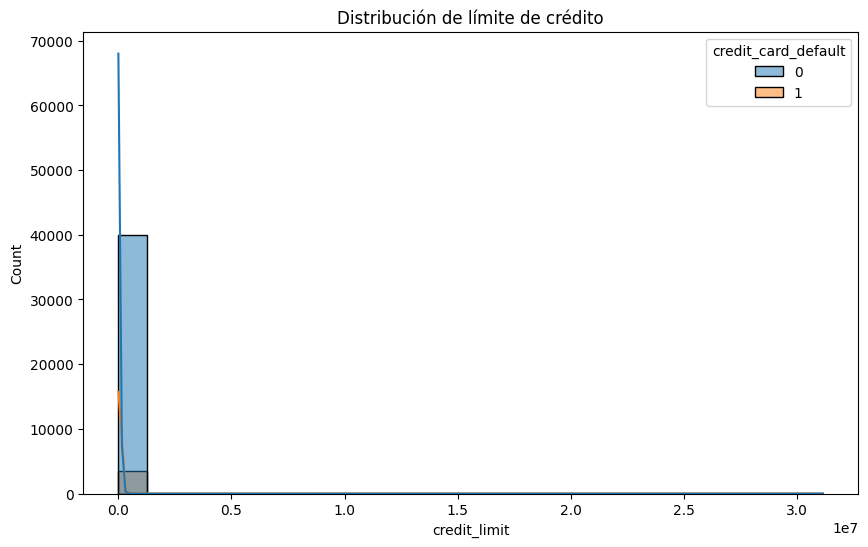

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='credit_limit', hue='credit_card_default',kde=True,  bins=25)
plt.title('Distribución de límite de crédito')

print('Valor de Asimetria :', round(skew(df_train['credit_limit']), 2))


## Porcentaje del Uso del limite de credito vs Morosidad

En este apartado se observa un comportamiento bastante peculiar de los clientes que presentan morosidad (default). Observe como a partir de alrededor del 70% de uso del limite de credito se comienza a presentar morosidad en los clientes.

Text(0.5, 1.0, 'Distribución de  % Uso del limite de crédito')

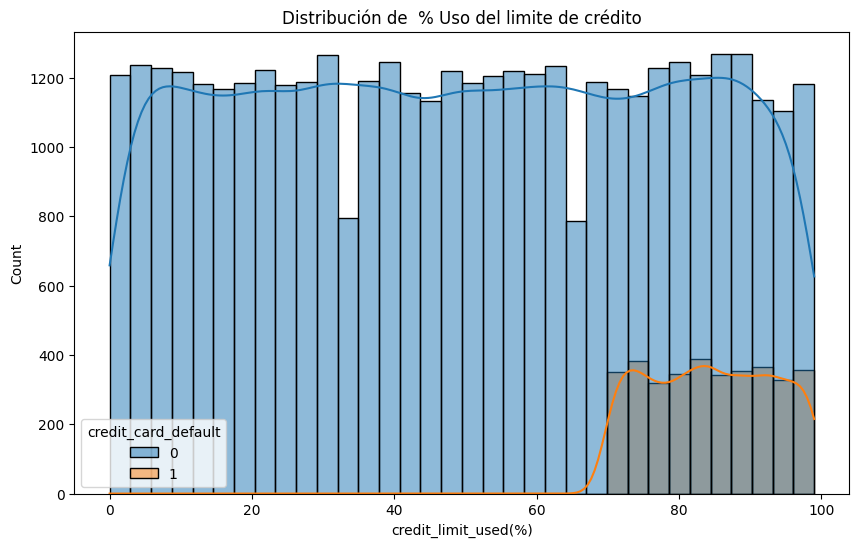

In [194]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x = 'credit_limit_used(%)', hue = 'credit_card_default', kde = True)
plt.title('Distribución de  % Uso del limite de crédito')

Esta grafica de cajas permite observar de manera mas evidente este comportamiento.

Text(0.5, 1.0, 'Distribución de  % Uso del limite de crédito')

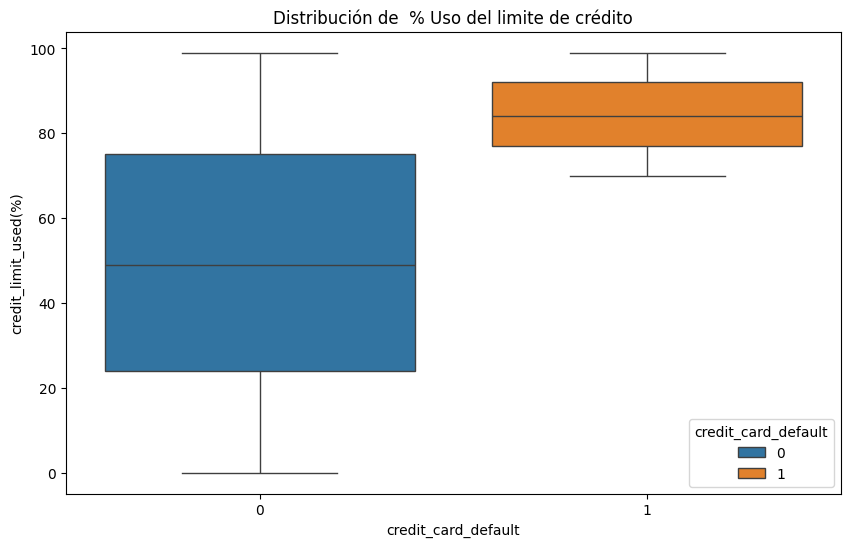

In [193]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, y = 'credit_limit_used(%)', x = 'credit_card_default', hue = 'credit_card_default')
plt.title('Distribución de  % Uso del limite de crédito')

## Puntaje de credito vs Morosidad

En analisis del puntaje de los creditos de los clientes muestra un comportamiento inverso al de uso del limite de credito. Se observa que la morosidad se presenta en clientes cuyo puntaje de credito es bajo. Lo cual es bastante logico.

Text(0.5, 1.0, 'Distribución de Puntaje de Credito')

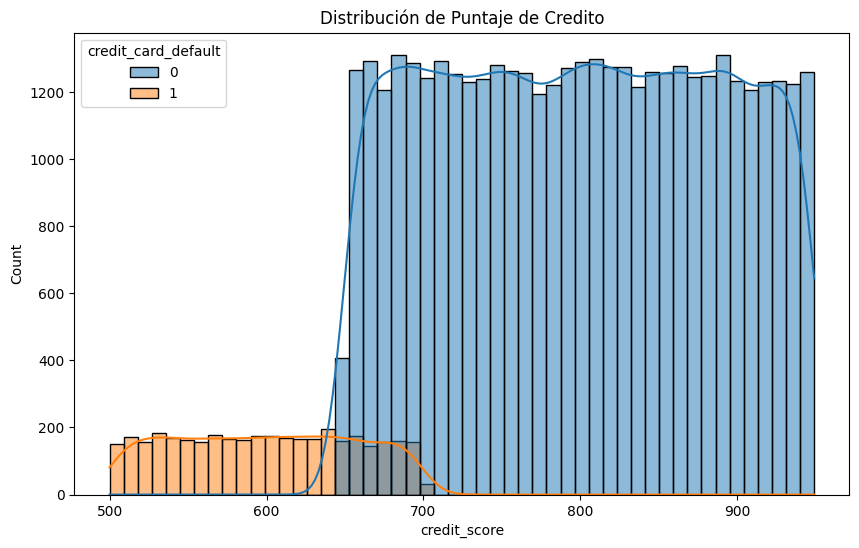

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x = 'credit_score', hue = 'credit_card_default', kde = True)
plt.title('Distribución de Puntaje de Credito')

Text(0.5, 1.0, 'Distribucion de Puntaje de Credito')

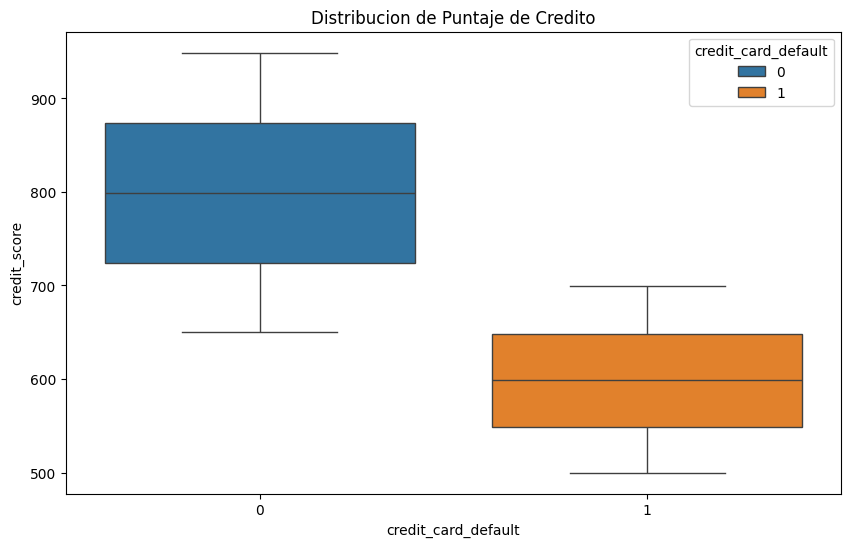

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, y = 'credit_score', x = 'credit_card_default', hue = 'credit_card_default')
plt.title('Distribucion de Puntaje de Credito')

# Pagos de Deuda Anual vs Morosidad

En este apartado se observa un comportamiento similar en la distribucion de los clientes morosos.  La grafica muestra una asimetria hacia la derecha.

Valor de Asimetria : 1.73


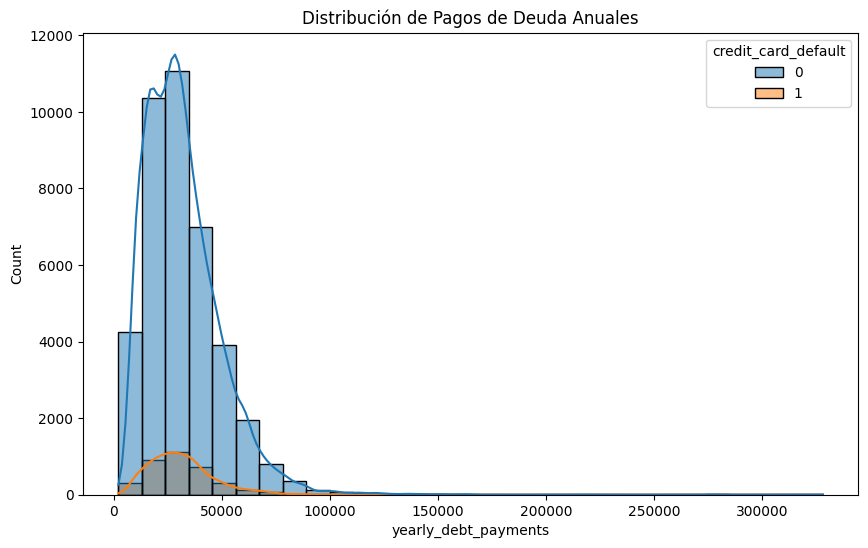

In [213]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x = 'yearly_debt_payments', hue = 'credit_card_default', kde = True, bins = 30)
plt.title('Distribución de Pagos de Deuda Anuales')

print('Valor de Asimetria :', round(skew(df_train['yearly_debt_payments']), 2))


## Incumplimientos previos vs Morosidad

Esta distribucion muestra como los clientes que han sido incumplidos con el pago de sus obligaciones tienen a ser reincidentes.

Text(0.5, 1.0, 'Distribución de credit_card_default por incumplimientos previos')

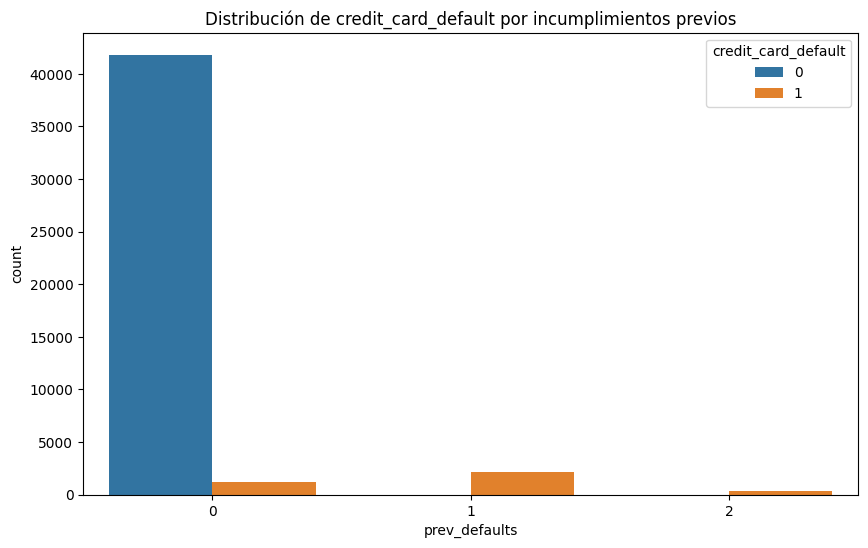

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x = 'prev_defaults', hue = 'credit_card_default')
plt.title('Distribución de credit_card_default por incumplimientos previos')

## Incumplimiento en los ultimos 6 meses vs Morosidad

Similar a la distribucion anterior, clientes previamente morosos tienen a reincidir

Text(0.5, 1.0, 'Distribución de credit_card_default por incumplimiento en los últimos 6 meses')

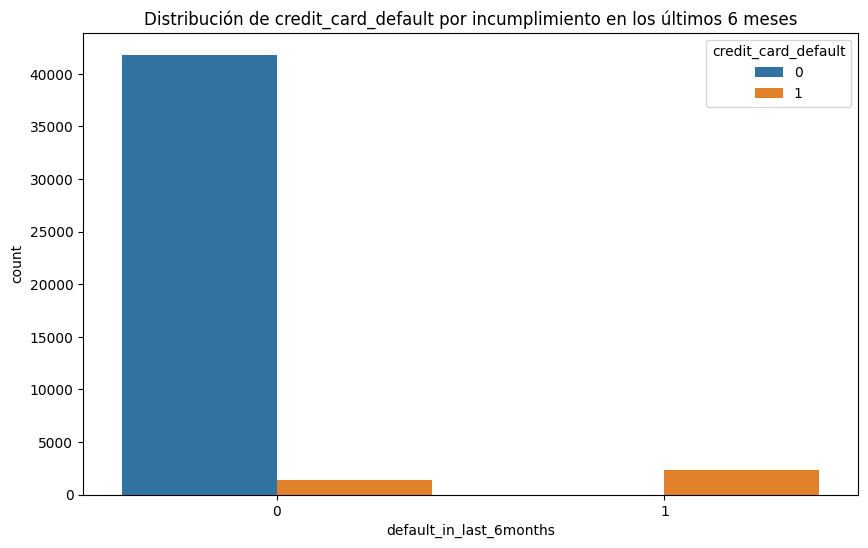

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x = 'default_in_last_6months', hue = 'credit_card_default')
plt.title('Distribución de credit_card_default por incumplimiento en los últimos 6 meses')

# Conclusiones

1. Existe un desbalanceo de las clases en el dataset de credit risk, siendo predominante la clase 0, frente a la clase 1 (default o Morosidad)
2. Clientes que superaron su limite de credito por encima del 70% tienen a presentar morosidad en el pago de su deuda
3. Un puntaje de credito bajo muestra una relacion inversa con la morosidad.
4. Clientes que han sido morosos en el pasado tienen a reincidir.
5. Las variables net_yearly_income, yearly_debt_payment, credit_limit presentan una alta asimetria positiva, lo que hace recomendable aplicar alguna tecnica de transformacion de los datos para evitar que esto impacte negativamente al modelo de Machine Learning

# Calidad de los datos

In [ ]:
# Número de duplicados
num_duplicados = df_train.duplicated().sum()
print(f"Número de registros duplicadao: {num_duplicados}")

print("\n")

# Número de nulos por columna
num_nulos = df_train.isnull().sum().sort_values(ascending=False)
print('Total de registros nulos: ' , num_nulos.sum())
print("Número de valores nulos por columna:")
num_nulos[num_nulos > 0]

Número de registros duplicadao: 0


Total de registros nulos:  2057
Número de valores nulos por columna:


no_of_children          774
owns_car                547
no_of_days_employed     463
yearly_debt_payments     95
migrant_worker           87
total_family_members     83
credit_score              8
dtype: int64